In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [2]:
#use glob.glob to read all csv files in my current path
my_list = [i for i in glob.glob('*.{}'.format('csv'))]
my_list

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [3]:
dataframes = [] # list to store each data frame separately
for csv in my_list:
    df = pd.read_csv(csv)
#after reading datasets add column to identify each dataset uniquely by the first two char of each one
    df['country'] = csv[0:2] 
    dataframes.append(df)
    
dataframes[0].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# Check Data Types

In [5]:
for df in dataframes:
    
    df['video_id']=df['video_id'].astype('str') #video_id object--->str
    df['trending_date'] = df['trending_date'].astype('str') #trending_date object--->str
    date_pieces = (df['trending_date'].str.split('.')) #then spliting it to year,month,day 
    #convert each one to int 
    df['Year'] = date_pieces.str[0].astype(int)
    df['Day'] = date_pieces.str[1].astype(int)
    df['Month'] = date_pieces.str[2].astype(int)
    
    updatedyear = [] #update formate of year from 17-->2017
    for i in range(len(df)) : 
        y = df.loc[i, "Year"]
        new_year = y+2000
        updatedyear.append(new_year)
        
    for i in range(len(df)): 
        new_year = updatedyear[i]
        old = df.loc[i, "Year"]
        df['Year'].replace(to_replace = old, value = new_year, inplace=True)
        
    del df['trending_date'] #replace old column by new with new format
    df['trending_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format = "%Y-%m-%d")
    del df['Year']
    del df['Day']
    del df['Month']
    
    df['title'] = df['title'].astype('str') #tile object--->str
    df['channel_title'] = df['channel_title'].astype('str') 
    df['category_id'] = df['category_id'].astype(str)
    df['tags'] = df['tags'].astype('str')
    df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
    df['description'] = df['description'].astype('str')
    
    df['comments_disabled'] = df['comments_disabled'].astype('category') # boolean--->categorical
    df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
    df['video_error_or_removed'] = df['video_error_or_removed'].astype('category')

In [6]:
#after converting publish_time to datetime format split it to 2columns date&time
for df in dataframes:
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')
    
    df.insert(4, 'publish_date', df['publish_time'].dt.date) # Insert 'publish_date' column with dates extracted from 'publish_time'
    
    df['publish_time'] = df['publish_time'].dt.time
    
# Changing data type for 'publish_date' from object to 'datetime'
for df in dataframes:
     df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

In [7]:
dataframes[0].dtypes

video_id                          object
title                             object
channel_title                     object
category_id                       object
publish_date              datetime64[ns]
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
trending_date             datetime64[ns]
dtype: object

In [8]:
df.isnull().sum() #no missing values

video_id                  0
title                     0
channel_title             0
category_id               0
publish_date              0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
country                   0
trending_date             0
dtype: int64

In [9]:
df['channel_title'].unique() #checking inconsistency of each column

array(['CaseyNeistat', 'LastWeekTonight', 'Rudy Mancuso', ...,
       'All Def Digital', 'How It Should Have Ended',
       'Ubisoft North America'], dtype=object)

# EDA

In [10]:
for df in dataframes:
    df.set_index('video_id', inplace=True)

In [11]:
combined_df = pd.concat(dataframes)

In [12]:
# Making copy of original dataframe
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

In [13]:
# Sorting according to latest trending date while removing duplicates
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')

# Doing the same above operation for each of the individual dataframes in the list we created earlier
for df in dataframes:
    df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

combined_df[['publish_date','publish_time','trending_date', 'country']].head()

,publish_date,publish_time,trending_date,country
video_id,,,,
ooyjaVdt-jA,2018-05-17,17:09:38,2018-06-14,US
NXwn1iUbbJU,2018-06-13,20:13:30,2018-06-14,FR
AN2KspjYRLc,2018-06-12,15:07:36,2018-06-14,FR
WGKOBMZAwuM,2018-06-13,07:00:05,2018-06-14,FR
zauQhWWpa0s,2018-06-13,23:34:13,2018-06-14,FR


# Inserting Category Column for Analysis

In [14]:
with open('US_category_id.json', 'r') as f:  # reading one randomly selected json files to make sense of its contents
    data = f.read()
# parse file
obj = json.loads(data)
# printing
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [15]:
category_id = {}
with open('DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']
        
combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))

backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))

for df in dataframes:
    df.insert(2, 'category', df['category_id'].map(category_id))
    

combined_df.head(3)

,title,channel_title,category,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,,
ooyjaVdt-jA,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,20,2018-05-17,17:09:38,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,US,2018-06-14
NXwn1iUbbJU,Série ADJA - Episode 28,Marodi TV Sénégal,Entertainment,24,2018-06-13,20:13:30,"senegal|""video""|""divertissement""|""humour""|""you...",213980,3940,188,801,https://i.ytimg.com/vi/NXwn1iUbbJU/default.jpg,False,False,False,Retrouvez - nous sur http://www.marodi.tv ou t...,FR,2018-06-14
AN2KspjYRLc,UN YOUTUBER DANS L'EMISSION LA PLUS GÊNANTE DE...,Chelxie,Comedy,23,2018-06-12,15:07:36,"youtuber|""skyyart""|""les 12 coeurs""|""emission g...",176036,3673,1625,456,https://i.ytimg.com/vi/AN2KspjYRLc/default.jpg,False,False,False,un youtuber dans une emission génante france l...,FR,2018-06-14


In [16]:
combined_df['category'].unique()

array(['Gaming', 'Entertainment', 'Comedy', 'Sports', 'Music',
       'Howto & Style', 'Film & Animation', 'People & Blogs', 'Education',
       'News & Politics', 'Pets & Animals', nan, 'Shows',
       'Travel & Events', 'Autos & Vehicles', 'Science & Technology',
       'Movies', 'Trailers'], dtype=object)

# Explore and Data Analysis

#Ratio of likes-dislikes in different categories

<AxesSubplot:xlabel='ratio', ylabel='category'>

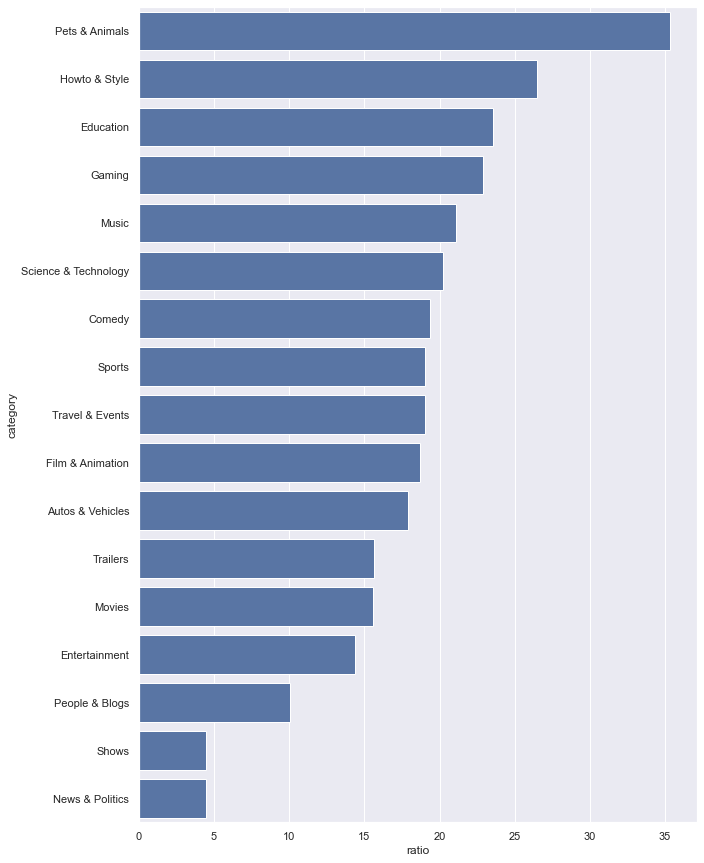

In [17]:
# calculating total likes for each category
likesdf = combined_df.groupby('category')['likes'].agg('sum')

# calculating total dislikes for each category
dislikesdf = combined_df.groupby('category')['dislikes'].agg('sum')

# calculating ratios of likes to dislikes
ratiodf = likesdf/dislikesdf 

# most liked category to appear on top
ratiodf = ratiodf.sort_values(ascending=False).reset_index()

# plotting bar chart
ratiodf.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=ratiodf,
            label="Likes-Dislikes Ratio", color="b")

#Most liked categories 

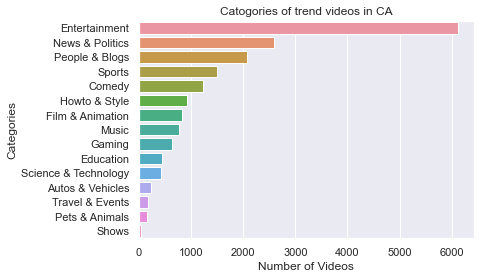

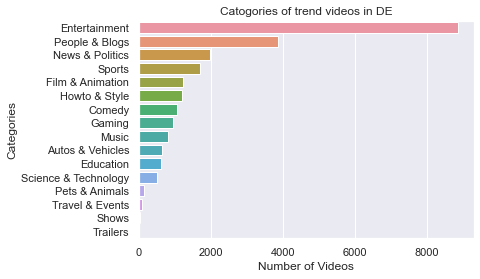

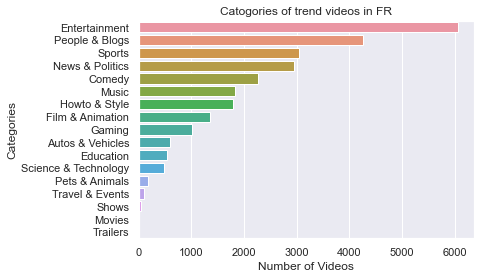

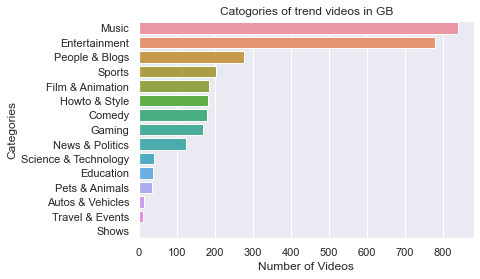

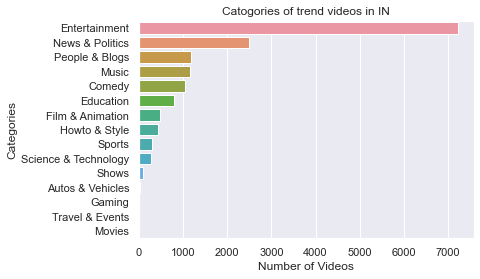

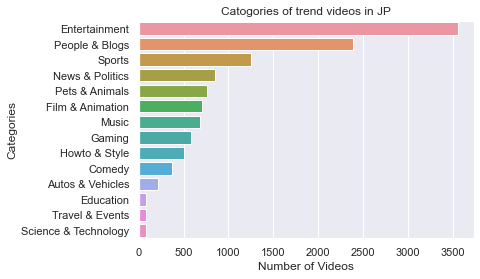

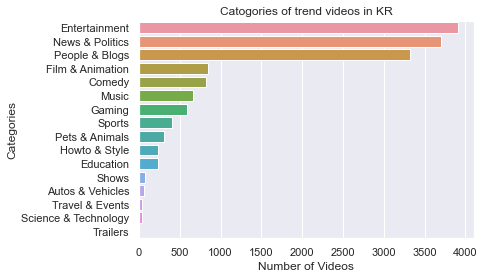

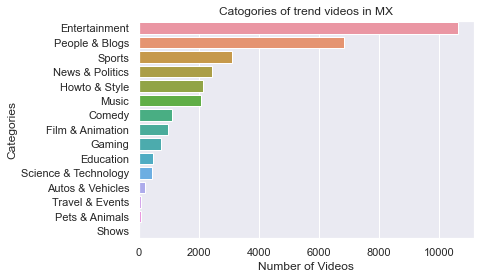

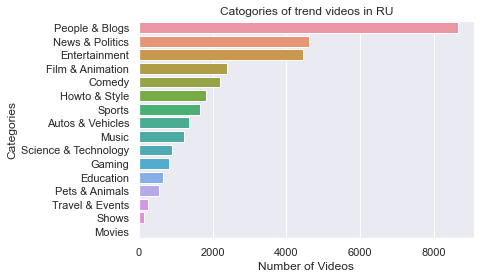

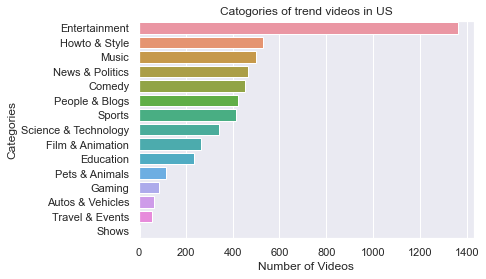

In [18]:
# Getting names of all countries
countries = []
allcsv = [i for i in glob.glob('*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[0:2]
    countries.append(c)
for country in countries:
    if country == 'US':
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
    else:
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
        plt.figure()

#Top 5 videos that are on trending in each country

In [20]:
temporary = []
for df in dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['views'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are on trending
    temporary.append(temp)

In [21]:
# Printing 3 randomly selected countries
temporary[2][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,100911567,2656682
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,65396157,4750254
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,60776509,2183745
TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,47078714,1763400
BhIEIO0vaBE,To Our Daughter,Kylie Jenner,People & Blogs,44818108,0


#Is the most liked video also the most trending video

In [22]:
temporary = [] # to store results for each country
for df in dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['likes'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are most liked
    temporary.append(temp)

In [27]:
# Printing 3 randomly selected results
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


In [25]:
temporary[1][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,73463137,4924056
FlsCjmMhFmw,113876217,2811217
6ZfuNTqbHE8,80360459,2513103
VYOjWnS4cMY,73432600,2478908
kTlv5_Bs8aw,24628712,2454901


In [26]:
temporary[2][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,65396157,4750254
FlsCjmMhFmw,100911567,2656682
OK3GJ0WIQ8s,15777624,2392595
kTlv5_Bs8aw,20565795,2320652
p8npDG2ulKQ,15875379,2285431


#Calculating days between publish and trending date

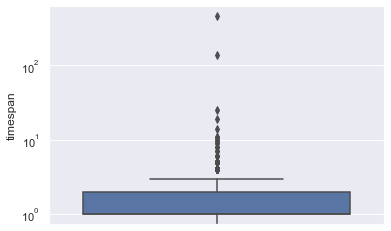

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


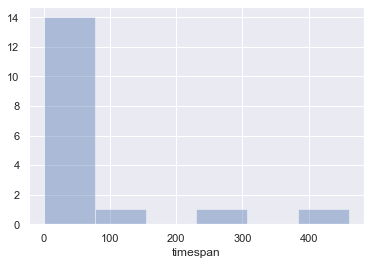

In [30]:
temporary = []
for data in dataframes:
    temp = data
    temp['timespan'] = (temp['trending_date'] - temp['publish_date']).dt.days
    temporary.append(temp)
# Plotting
to_trending = temporary[0].sample(1000).groupby('video_id').timespan.max() # CA
sns_ax = sns.boxplot(y = to_trending)
_ = sns_ax.set(yscale = "log")
plt.show()
_ = sns.distplot(to_trending.value_counts(),bins='rice',kde=False)